In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import KeyFunctions as me

import matplotlib as mlp

import warnings
warnings.filterwarnings("ignore")

mlp.rcParams['font.family'] = 'Nimbus Roman'
mlp.rcParams['figure.dpi']= 300
mlp.rcParams['axes.linewidth'] = 1.5
mlp.rcParams['ytick.major.width'] = 1
mlp.rcParams['xtick.major.width'] = 1

In [2]:
df = pd.read_csv('OptAccel.csv', index_col = 0)
df

,Unseeded Convergence,Seeded Convergence,Iteration Reduction,Time Reduction
0,True,True,91.258,93.906
1,True,True,89.224,93.936
2,True,True,92.119,92.140
3,True,True,88.814,91.556
4,True,True,88.793,91.381
5,False,True,36.431,53.434
6,True,True,89.615,92.140
7,False,True,61.930,79.592
8,True,True,90.712,93.137
9,True,True,89.364,93.355


In [3]:
DataSet = "DimJiaLi Unique"
EOS = 'PR'
for ind, row in df.iterrows():
    [y, Tc, Pc, w, C, R, Vc, k, mxNames] = me.LookUpMix(ind, DataSet, EOS)
    df.loc[ind, 'numComps'] = len(mxNames)
    if df.loc[ind, 'Unseeded Convergence'] == False:
        df.loc[ind, 'Iteration Reduction'] = 100
        df.loc[ind, 'Time Reduction'] = 100
display(df)
df = df.drop(['Unseeded Convergence', 'Seeded Convergence'], axis = 1)
df['numComps'] = df['numComps'].astype(int)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


,Unseeded Convergence,Seeded Convergence,Iteration Reduction,Time Reduction,numComps
0,True,True,91.258,93.906,2.0
1,True,True,89.224,93.936,2.0
2,True,True,92.119,92.140,3.0
3,True,True,88.814,91.556,3.0
4,True,True,88.793,91.381,3.0
5,False,True,100.000,100.000,3.0
6,True,True,89.615,92.140,3.0
7,False,True,100.000,100.000,3.0
8,True,True,90.712,93.137,3.0
9,True,True,89.364,93.355,3.0


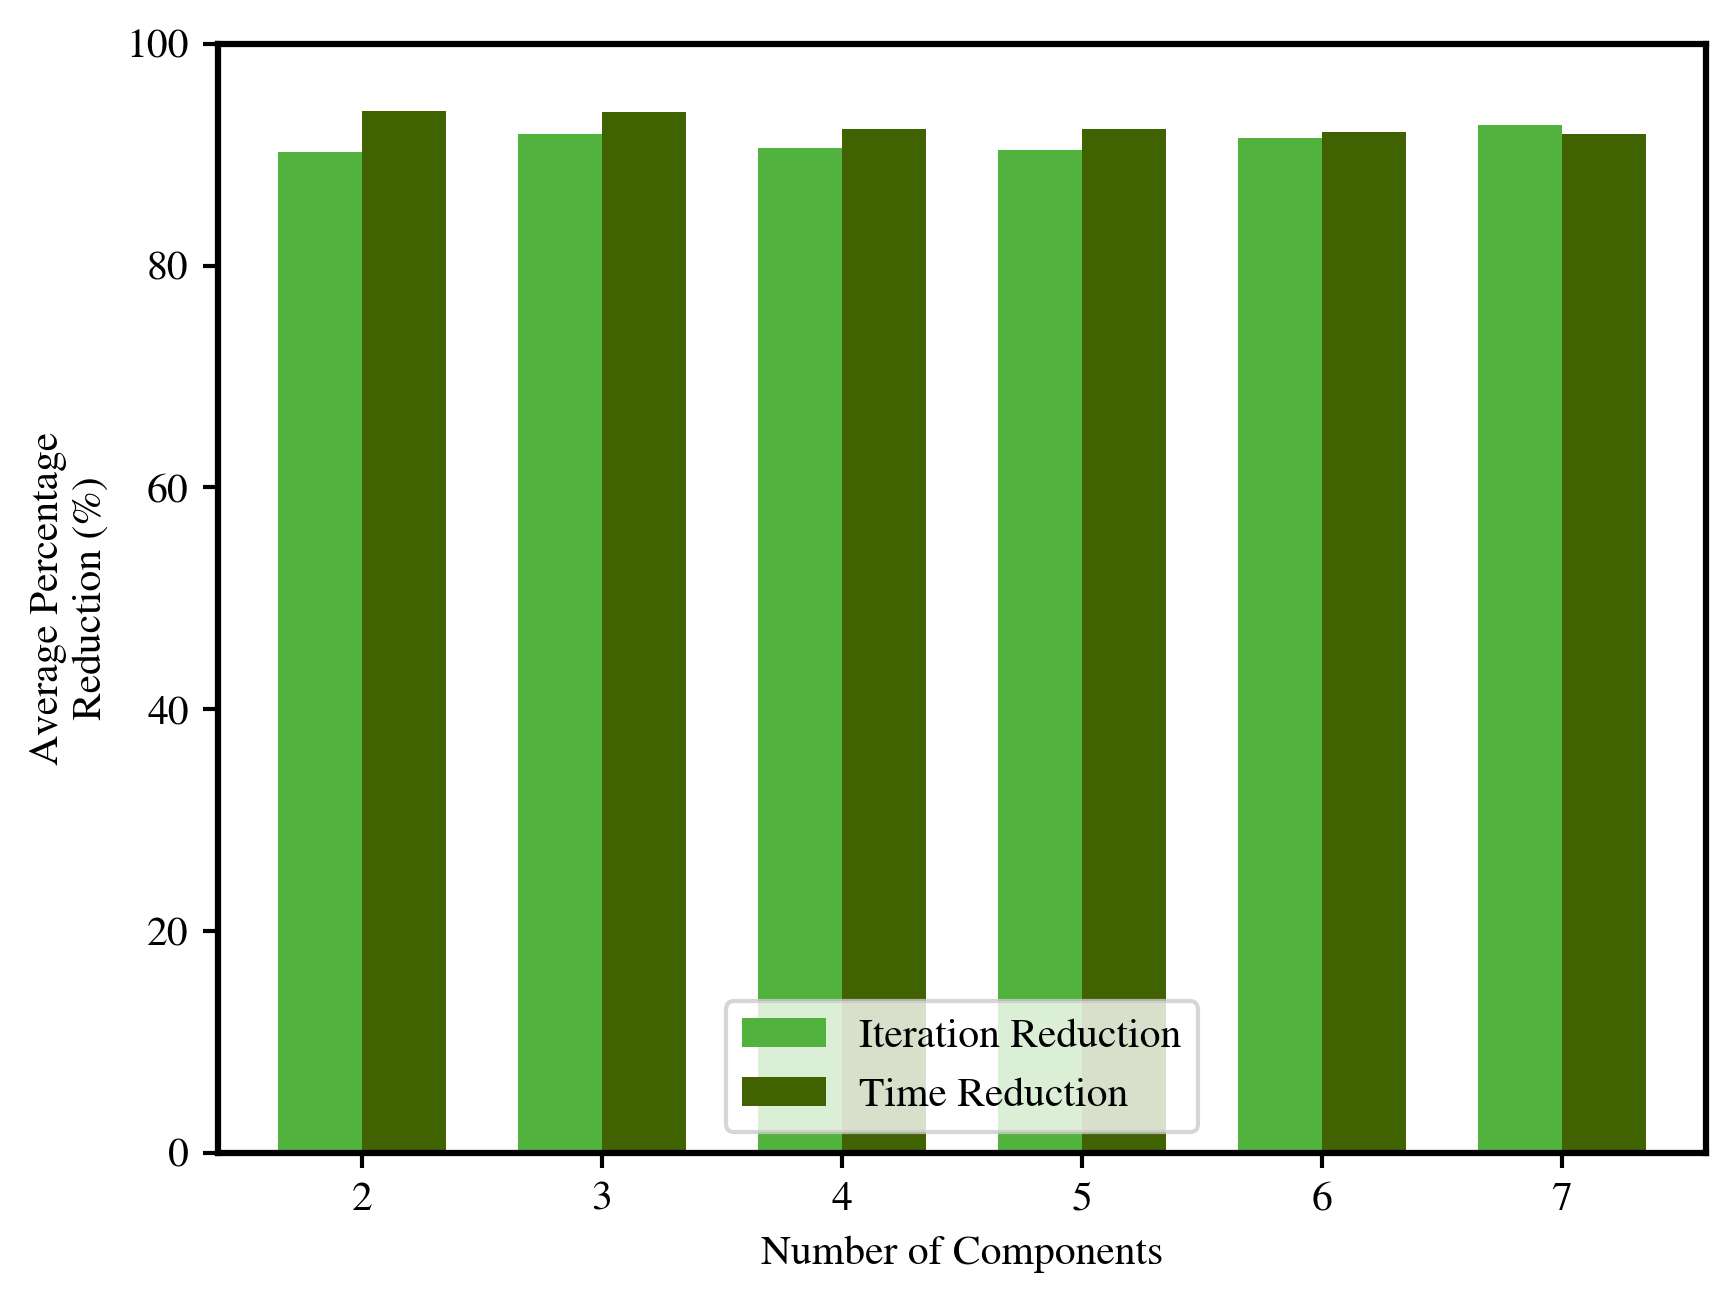

In [8]:
from matplotlib.ticker import MaxNLocator
plotting = pd.pivot_table(df, index = 'numComps')
ax = plt.figure().gca()
plotting.plot.bar(width = 0.7, ax = ax, color = ['#51B33D', '#406200'])
ax.set_ylim([0, 100])
ax.set_ylabel('Average Percentage\nReduction (%)')
ax.set_xlabel('Number of Components')
plt.xticks(rotation=0)
plt.legend(loc=8)